<a href="https://colab.research.google.com/github/isaacmedina/machinelearning/blob/main/taller1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Taller 1 - Machine Learning

Ejemplo: estadística descriptiva básica con pandas, numpy y scipy

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

#1. Creamos un DataFrame sencillo

In [2]:
data = {
    "edad":    [25, 32, 47, 51, 38, 29, 41, 33, 27, 30],
    "ingreso": [500, 620, 850, 900, 700, 520, 780, 610, 540, 590],
    "sector":  ["TI", "Salud", "Educación", "Finanzas", "TI",
                "Salud", "TI", "Educación", "Salud", "Finanzas"],
}
df = pd.DataFrame(data)
print("\n=== Datos crudos ===")
print(df)


=== Datos crudos ===
   edad  ingreso     sector
0    25      500         TI
1    32      620      Salud
2    47      850  Educación
3    51      900   Finanzas
4    38      700         TI
5    29      520      Salud
6    41      780         TI
7    33      610  Educación
8    27      540      Salud
9    30      590   Finanzas


#2. Descripción rápida de pandas

In [3]:
print("\n=== df.describe() ===")
print(df.describe().round(2))


=== df.describe() ===
        edad  ingreso
count  10.00    10.00
mean   35.30   661.00
std     8.71   140.75
min    25.00   500.00
25%    29.25   552.50
50%    32.50   615.00
75%    40.25   760.00
max    51.00   900.00


#3. Métricas adicionales manuales

In [4]:
media_ing = df["ingreso"].mean()
mediana_ing = df["ingreso"].median()
moda_ing = df["ingreso"].mode()[0]
iqr_ing = np.percentile(df["ingreso"], 75) - np.percentile(df["ingreso"], 25)
asimetria_ing = stats.skew(df["ingreso"])
curtosis_ing = stats.kurtosis(df["ingreso"])
print("\n=== Métricas personalizadas para 'ingreso' ===")
print(f"Media      : {media_ing:.2f}")
print(f"Mediana    : {mediana_ing:.2f}")
print(f"Moda       : {moda_ing:.2f}")
print(f"IQR        : {iqr_ing:.2f}")
print(f"Asimetría  : {asimetria_ing:.3f}")
print(f"Curtosis   : {curtosis_ing:.3f}")


=== Métricas personalizadas para 'ingreso' ===
Media      : 661.00
Mediana    : 615.00
Moda       : 500.00
IQR        : 207.50
Asimetría  : 0.539
Curtosis   : -1.094


#4. Estadística descriptiva por grupo

In [5]:
resumen_sector = (
    df.groupby("sector")["ingreso"]
      .agg(
          conteo="count",
          total="sum",
          media="mean",
          mediana="median",
          desvest="std",
      )
      .sort_values("total", ascending=False)
      .round(2)
)
print("\n=== Resumen por sector ===")
print(resumen_sector)


=== Resumen por sector ===
           conteo  total  media  mediana  desvest
sector                                           
TI              3   1980  660.0    700.0   144.22
Salud           3   1680  560.0    540.0    52.92
Finanzas        2   1490  745.0    745.0   219.20
Educación       2   1460  730.0    730.0   169.71


# 5. Visualización rápida

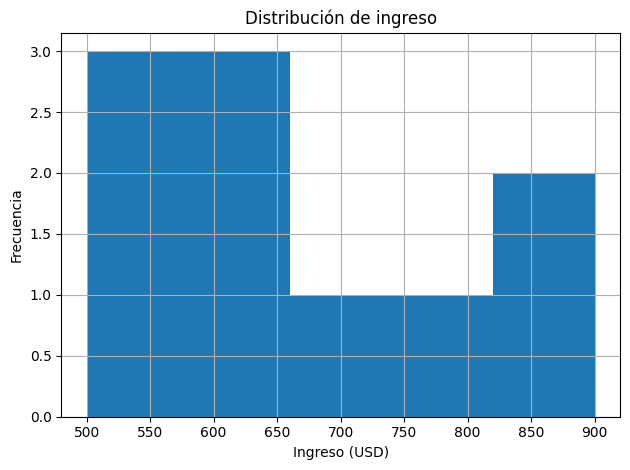

In [6]:
df["ingreso"].hist(bins=5)
plt.title("Distribución de ingreso")
plt.xlabel("Ingreso (USD)")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()